In [1]:
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel,ExponentialModel

In [2]:
mags=pd.read_csv('ALL-2MASS-matched.csv')

In [3]:
mags.columns

Index(['ID', 'Vmag', 'Vmag_ERR', 'UmB', 'UmB_ERR', 'BmV', 'BmV_ERR', 'VmR',
       'VmR_ERR', 'VmI', 'VmI_ERR', 'RA', 'DEC', 'GLON', 'GLAT', 'VHEL',
       'VHEL_ERR', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'ABUN', 'ABUN_ERR',
       'designation', 'j_m', 'j_cmsig', 'j_msigcom', 'j_snr', 'h_m', 'h_cmsig',
       'h_msigcom', 'h_snr', 'k_m', 'k_cmsig', 'k_msigcom', 'k_snr', 'ph_qual',
       'rd_flg', 'bl_flg', 'cc_flg', 'gal_contam', 'mp_flg', 'pts_key',
       'j_m_stdap', 'j_msig_stdap', 'h_m_stdap', 'h_msig_stdap', 'k_m_stdap',
       'k_msig_stdap'],
      dtype='object')

In [4]:
mags['k_0']=mags['k_m']-0.306*0.19
mags['j_0']=mags['j_m']-0.72*0.19
mags['h_0']=mags['h_m']-0.46*0.19
mags['jmk_o']=mags['j_0']-mags['k_0']

In [5]:
mags['k_02']=mags['k_m']-0.306*0.3
mags['j_02']=mags['j_m']-0.72*0.3
mags['h_02']=mags['h_m']-0.46*0.3
mags['jmk_o2']=mags['j_02']-mags['k_02']

In [6]:
rc=mags.loc[(mags['k_0'] < 14) & (0.45<= mags['jmk_o'])&( mags['jmk_o']<=0.75)]

In [7]:
rc_2=mags.loc[(mags['k_02'] < 14) & (0.45<= mags['jmk_o2'])&( mags['jmk_o2']<=0.75)]

In [8]:
plt.xkcd()

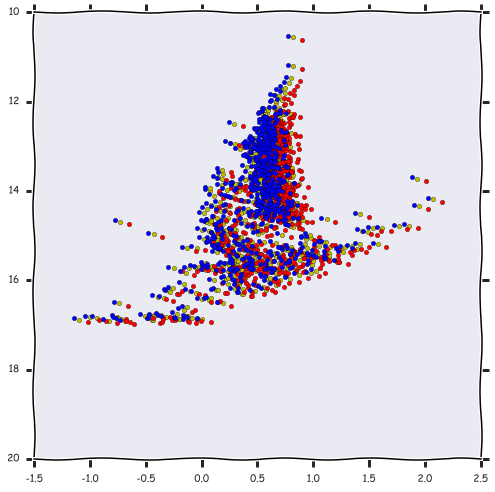

In [9]:
plt.figure(figsize=(8,8))
sns.plt.scatter(mags['jmk_o'],mags['k_0'],c='y')
sns.plt.scatter(mags['j_m']-mags['k_m'],mags['k_m'],c='r')
sns.plt.scatter(mags['jmk_o2'],mags['k_02'],c='b')
#sns.plt.scatter(rc['jmk_o'],rc['k_0'])
plt.ylim(10,20)
plt.gca().invert_yaxis()

In [10]:
absK=-1.5#+u'\u00B1'0.2

In [11]:
rc['dist_k']=10 ** (((rc['k_0']-absK)/5)-2)
rc['errdist_k']=rc['dist_k']*(np.log(10)/5)*np.sqrt(abs(rc['k_cmsig']**2-0.2**2))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
rc_2['dist_k2']=10 ** (((rc_2['k_0']-absK)/5)-2)
rc_2['errdist_k2']=rc_2['dist_k2']*(np.log(10)/5)*np.sqrt(abs(rc_2['k_cmsig']**2-0.2**2))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
full_data=pd.read_csv('canis_distances.csv')

In [14]:
full_data.head(6)

,0,0_l,0_x,0_x.1,1_x,ID,Vmag,Vmag_ERR,0_y,1_y,...,mod_y,vmag,dist,errd,0_m,1_m,2,mod,dist_uly,errd_uly
0,2801,2801,2801,2801,0.309335,2801,17.3668,0.0252,vnSt02801.dft,4916,...,2801,17.057465,7.717844,1.270318,vnSt02801.dft,0.321289,0.403644,2801,22.245142,4.126973
1,1928,1928,1928,1928,0.899969,1928,17.0384,0.0246,vnSt01928.dft,4661,...,1928,16.138431,9.542136,2.787430,vnSt01928.dft,0.437091,0.333029,1928,13.812360,2.112555
2,2231,2231,2231,2231,0.241863,2231,17.1035,0.0257,vnSt02231.dft,4398,...,2231,16.861637,0.976621,0.785121,vnSt02231.dft,8.166894,0.781711,2231,0.548212,0.197245
3,2796,2796,2796,2796,0.548480,2796,17.3454,0.0250,vnSt02796.dft,4194,...,2796,16.796920,3.901395,1.964423,vnSt02796.dft,8.108832,0.358678,2796,0.546534,0.090055
4,2478,2478,2478,2478,0.195394,2478,17.1329,0.0242,vnSt02478.dft,4577,...,2478,16.937506,4.850573,0.468594,vnSt02478.dft,4.140958,0.428076,2478,3.625012,0.713479
5,1889,1889,1889,1889,0.267253,1889,16.8150,0.0241,vnSt01889.dft,4792,...,1889,16.547747,17.508655,3.416453,vnSt01889.dft,0.402294,0.439009,1889,16.946911,3.421007


In [15]:
full_data.columns

Index(['0', '0_l', '0_x', '0_x.1', '1_x', 'ID', 'Vmag', 'Vmag_ERR', '0_y',
       '1_y', '2_x', '3', '4', '5', '6', 'mod_x', '0_y.1', '1_l', '2_y',
       'mod_y', 'vmag', 'dist', 'errd', '0_m', '1_m', '2', 'mod', 'dist_uly',
       'errd_uly'],
      dtype='object')

In [16]:
old_dist=pd.DataFrame([full_data['0'],full_data['dist'],full_data['errd'],full_data['dist_uly'],full_data['errd_uly'],\
                       full_data['1_y'],full_data['2_x'],full_data['3'],full_data['4'],full_data['5'],full_data['6']\
                      ]).T

In [17]:
rc_merged=rc.merge(old_dist,left_on=['ID'],right_on=['0'])

In [18]:
rc_merged_k2=rc_2.merge(old_dist,left_on=['ID'],right_on=['0'])

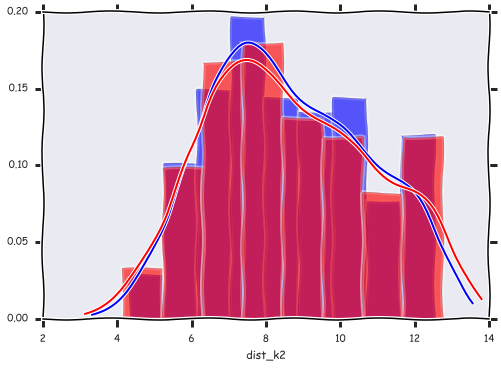

In [19]:
sns.distplot(rc_merged['dist_k'])
sns.distplot(rc_merged_k2['dist_k2'])
#sns.distplot(rc_merged['dist'].dropna())
#sns.distplot(rc_merged['dist_uly'].dropna())

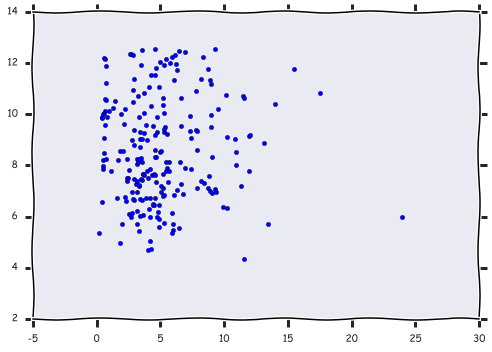

In [20]:
plt.scatter(rc_merged['dist'],rc_merged['dist_k'])

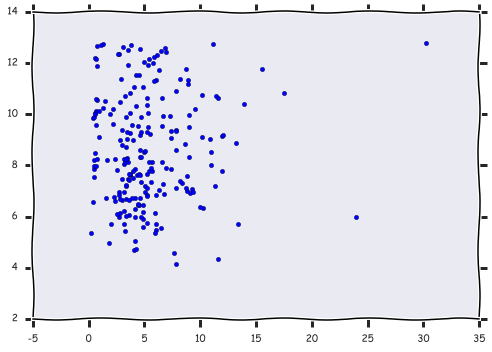

In [21]:
plt.scatter(rc_merged_k2['dist'],rc_merged_k2['dist_k2'])

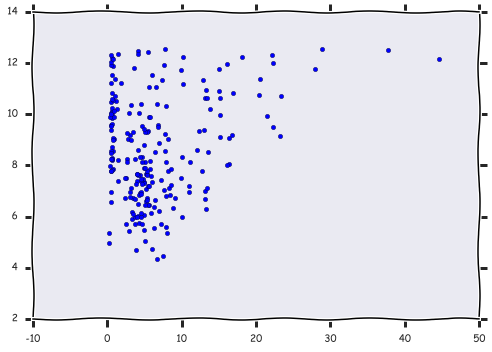

In [22]:
plt.scatter(rc_merged['dist_uly'],rc_merged['dist_k'])

In [23]:
full_data.columns

Index(['0', '0_l', '0_x', '0_x.1', '1_x', 'ID', 'Vmag', 'Vmag_ERR', '0_y',
       '1_y', '2_x', '3', '4', '5', '6', 'mod_x', '0_y.1', '1_l', '2_y',
       'mod_y', 'vmag', 'dist', 'errd', '0_m', '1_m', '2', 'mod', 'dist_uly',
       'errd_uly'],
      dtype='object')

In [24]:
rc_merged.head(2)

,ID,Vmag,Vmag_ERR,UmB,UmB_ERR,BmV,BmV_ERR,VmR,VmR_ERR,VmI,...,dist,errd,dist_uly,errd_uly,1_y,2_x,3,4,5,6
0,1467,16.2973,0.0241,0.7610,0.0439,1.1621,0.0289,0.7236,0.0289,1.3530,...,7.358949,2.761783,5.447758,0.659118,5008,244.5,2.93,0.46,-0.55,0.2
1,1018,15.8624,0.0253,99.9999,99.9999,1.2095,0.0291,0.7678,0.0292,1.4067,...,9.082802,2.285135,4.392786,0.602154,4816,110.5,2.71,0.27,-0.81,0.1


In [25]:
uly_para=pd.read_csv('uly_para',header=None)[[2,4,7,5,8,6,9]]

In [26]:
uly_para.columns=[['id-u','tu','ertu','gu','ergu','fu','erfu']]

In [27]:
rc_merged_2=rc_merged.merge(uly_para,left_on=['ID'],right_on=['id-u'],suffixes=('_t1','_t2'))

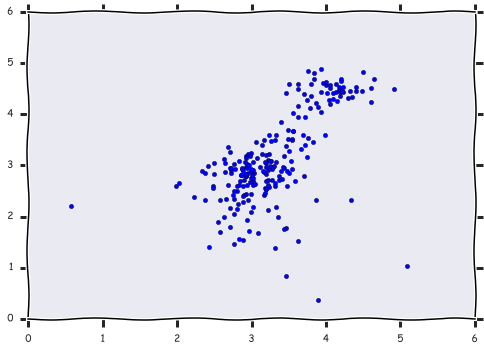

In [28]:
plt.scatter(rc_merged_2['3'],rc_merged_2['gu'])

(3500, 5500)

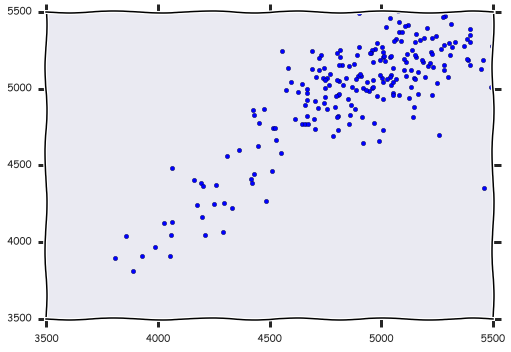

In [29]:
plt.scatter(rc_merged_2['1_y'],rc_merged_2['tu'])
plt.xlim(3500,5500)
plt.ylim(3500,5500)

In [30]:
rc_merged_2_lowg=rc_merged_2.loc[(rc_merged_2['3'] < 4.)]

In [31]:
rc_merged_2_lowg.columns

Index(['ID', 'Vmag', 'Vmag_ERR', 'UmB', 'UmB_ERR', 'BmV', 'BmV_ERR', 'VmR',
       'VmR_ERR', 'VmI', 'VmI_ERR', 'RA', 'DEC', 'GLON', 'GLAT', 'VHEL',
       'VHEL_ERR', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'ABUN', 'ABUN_ERR',
       'designation', 'j_m', 'j_cmsig', 'j_msigcom', 'j_snr', 'h_m', 'h_cmsig',
       'h_msigcom', 'h_snr', 'k_m', 'k_cmsig', 'k_msigcom', 'k_snr', 'ph_qual',
       'rd_flg', 'bl_flg', 'cc_flg', 'gal_contam', 'mp_flg', 'pts_key',
       'j_m_stdap', 'j_msig_stdap', 'h_m_stdap', 'h_msig_stdap', 'k_m_stdap',
       'k_msig_stdap', 'k_0', 'j_0', 'h_0', 'jmk_o', 'k_02', 'j_02', 'h_02',
       'jmk_o2', 'dist_k', 'errdist_k', '0', 'dist', 'errd', 'dist_uly',
       'errd_uly', '1_y', '2_x', '3', '4', '5', '6', 'id-u', 'tu', 'ertu',
       'gu', 'ergu', 'fu', 'erfu'],
      dtype='object')

(3500, 5500)

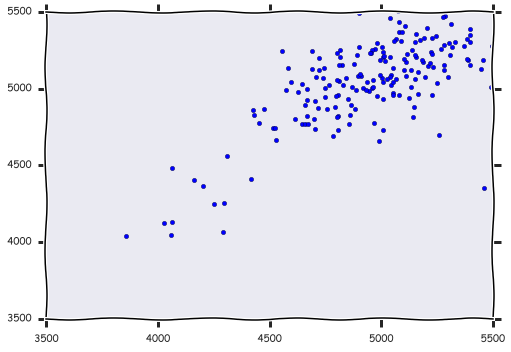

In [32]:
plt.scatter(rc_merged_2_lowg['1_y'],rc_merged_2_lowg['tu'])
plt.xlim(3500,5500)
plt.ylim(3500,5500)

In [33]:
len(rc_merged_2_lowg),len(rc_merged_2)

(193, 228)

(2, 14)

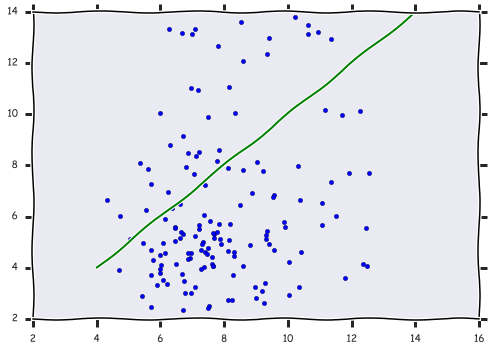

In [34]:
plt.scatter(rc_merged_2_lowg['dist_k'],rc_merged_2_lowg['dist_uly'],)
#plt.scatter(rc_merged_2_lowg['dist_k'],rc_merged_2_lowg['dist'],c='r')
plt.plot([4,14],[4,14],c='g')
plt.ylim(2,14)

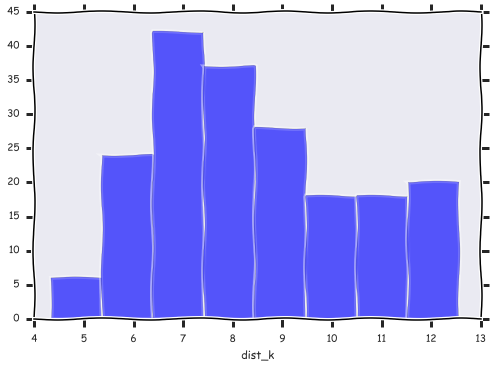

In [35]:
sns.distplot(rc_merged_2_lowg['dist_k'],kde=None)
#sns.distplot(rc_merged_2_lowg['dist_k2'])

In [36]:
sp.stats.pearsonr(rc_merged_2_lowg['dist_k'],rc_merged_2_lowg['dist'])

(nan, 1.0)

In [37]:
sp.stats.pearsonr(rc_merged_2_lowg['dist_k'],rc_merged_2_lowg['dist_uly'])

(0.38895952220153807, 2.2681174108149215e-08)

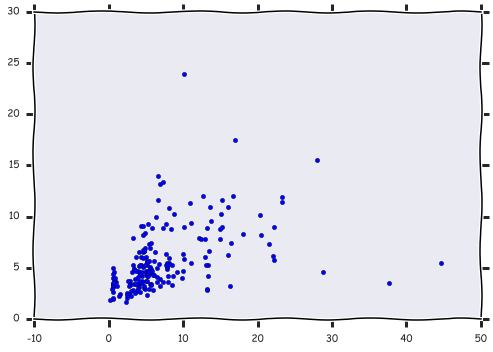

In [38]:
plt.scatter(rc_merged_2_lowg['dist_uly'],rc_merged_2_lowg['dist'])

In [39]:
#pd.read_csv('ALL-2MASS-matched.csv')['GLON']

In [40]:
c1c2=rc.merge(rc_2,left_on=['ID'],right_on=['ID'])

In [41]:
c1c2.columns

Index(['ID', 'Vmag_x', 'Vmag_ERR_x', 'UmB_x', 'UmB_ERR_x', 'BmV_x',
       'BmV_ERR_x', 'VmR_x', 'VmR_ERR_x', 'VmI_x',
       ...
       'k_0_y', 'j_0_y', 'h_0_y', 'jmk_o_y', 'k_02_y', 'j_02_y', 'h_02_y',
       'jmk_o2_y', 'dist_k2', 'errdist_k2'],
      dtype='object', length=117)

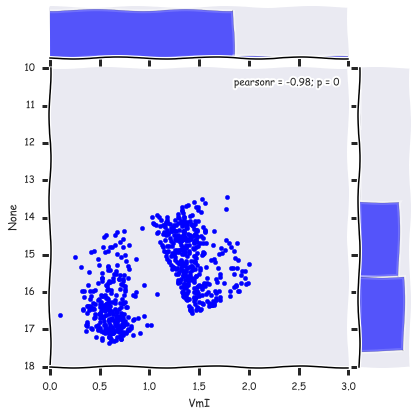

In [42]:
sns.jointplot(mags['VmI'],mags['Vmag']-mags['VmI'],xlim=(0,3),ylim=(18,10.))

In [43]:
cmd_box=mags.loc[(mags['VmI']> 1) & (mags['VmI']< 2.5) ]

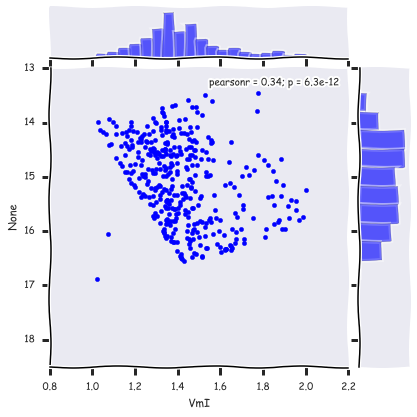

In [44]:
sns.jointplot(cmd_box['VmI'],cmd_box['Vmag']-cmd_box['VmI'],ylim=(18.5,13.))

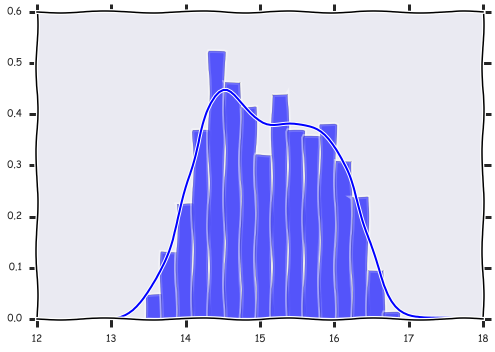

In [45]:
sns.distplot(cmd_box['Vmag']-cmd_box['VmI'],bins=16)

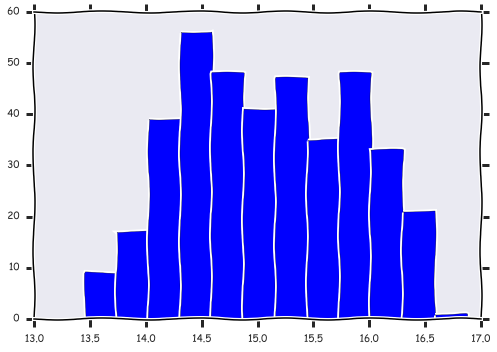

In [46]:
fn,bins,patches=plt.hist(cmd_box['Vmag']-cmd_box['VmI'],bins=12,)

In [47]:
bin_centers=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

In [48]:
def lf(x,a,b,c,d,e):
    c1=a * np.exp(-b*(x-c))
    c2=(d/(np.sqrt(2*np.pi)*e))* np.exp(-((x-c)**2/(2*e**2)))
    c3=(0.9*d/(np.sqrt(2*np.pi)*e))* np.exp(-((x-(c+0.737))**2/(2*e**2)))
    c4=(0.028*d/(np.sqrt(2*np.pi)*e))* np.exp(-((x-(c-1.07))**2/(2*e**2)))
    return (c1+c2+c3+c4)

#z=lf(bin_centers,1,2,15,200,0.5)
p0=[1,1,15,220,0.3]
optt,optv=curve_fit(lf,bin_centers,fn,p0,bounds=(0.2, [10, 10, 17.,395.,3.]))
print (optt)
sp.integrate.trapz(lf(bin_centers,*optt),bin_centers)

[  0.2          0.2         14.73543808  63.56583247   0.87136476]


110.01956565410444

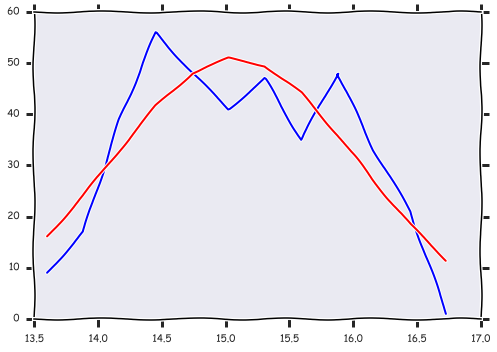

In [49]:
plt.plot(bin_centers,fn)
plt.plot(bin_centers,lf(bin_centers,*optt))

In [50]:
sp.integrate.trapz(fn,bin_centers)

111.02000000000007

In [51]:
sum(np.diff(bins)*fn)

112.44333333333341

In [52]:
sum(fn)

395.0

In [53]:
# def lf(x,*data):
#     #print (n1[i])
#     n1 =bin_centers
#     result=0.
#     for i in range(len(n1)):
#         c1=x[0] * np.exp(x[1]*(n1[i]-x[2]))
#         c2=(x[3]/(np.sqrt(2*np.pi)*x[4]))* np.exp(-((n1[i]-x[2])**2/(2*x[4]**2)))
#         c3=(0.2*x[3]/(np.sqrt(2*np.pi)*x[4]))* np.exp(-((n1[i]-(x[2]+0.737))**2/(2*x[4]**2)))
#         c4=(0.028*x[3]/(np.sqrt(2*np.pi)*x[4]))* np.exp(-((n1[i]-(x[2]-1.07))**2/(2*x[4]**2)))
#         result += (c1+c2+c3+c4)
#     #print (result)
#     return result
# curve_fit(lf,bin_centers,fn)
# # ff=differential_evolution(lf,bounds=[(0.,1.),(0.,1.),(1.,20.),(0.,395.),(0.,.5),(0,1)],args=(bin_centers,fn))
# # print (ff.x)

In [54]:
# def lf2(x,*data):
#     #print (n1[i])
#     n1 =bin_centers
#     result=0.
#     for i in range(len(n1)):
#         c1=x[0] * (x[1]*(n1[i]-x[2]))
#         c2=(x[3]/(np.sqrt(2*1)*x[4]))* sp.special.erf((n1[i]-x[2])**2/(2*x[4]**2))
#         c3=(0.2*x[3]/(np.sqrt(2*1)*x[4]))* sp.special.erf((n1[i]-(x[2]+0.737))**2/(2*x[4]**2))
#         c4=(0.028*x[3]/(np.sqrt(2*1)*x[4]))* sp.special.erf((n1[i]-(x[2]-1.07))**2/(2*x[4]**2))
#         result += (c1+c2+c3+c4)
#     #print (result)
#     return result-395
# ff=differential_evolution(lf2,bounds=[(0.1,.5),(0.1,.5),(10.,20.),(100.,395.),(0.,.5)],args=(bin_centers))
# ff.x

In [55]:
rc_cut_vi=pd.read_csv('rc_cut_vi',header=None,sep=' ')

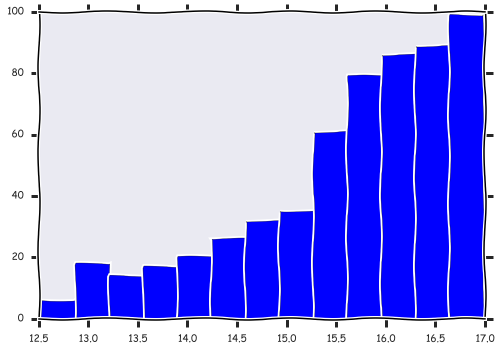

In [56]:
fn,bins,patches=plt.hist(rc_cut_vi[1],bins=13,)

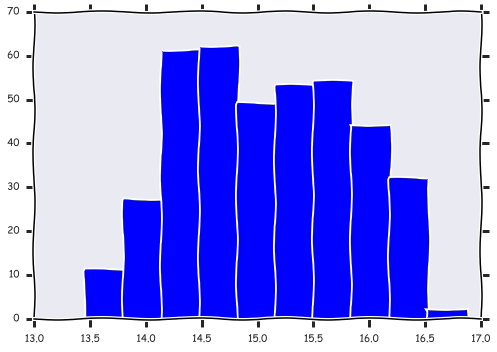

In [57]:
fn,bins,patches=plt.hist(cmd_box['Vmag']-cmd_box['VmI'])

In [58]:
bin_centers=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

In [59]:
ys=fn
xs=np.array(bin_centers)

In [60]:
ys

array([ 11.,  27.,  61.,  62.,  49.,  53.,  54.,  44.,  32.,   2.])

In [61]:
type(ys[0])

numpy.float64

In [62]:
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(ys, x=xs)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(15., min=10., max=20.)
pars['g1_sigma'].set(0.2, min=0.1,max=.5)
pars['g1_amplitude'].set(200., min=50.,max=395.)


# pars.add('g1_center',15, min=10, max=20)
# pars.add('g1_sigma',0.2, min=0)
# pars.add('g1_amplitude',200., min=50,max=395)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())
pars.add('g2_center',expr='0.737+g1_center')
pars.add('g2_sigma',expr='g1_sigma')
pars.add('g2_amplitude',expr='0.201*g1_amplitude')

gauss3 = GaussianModel(prefix='g3_')
pars.update(gauss2.make_params())
pars.add('g3_center',expr='g1_center-1.07')
pars.add('g3_sigma',expr='g1_sigma')
pars.add('g3_amplitude',expr='0.028*g1_amplitude')

mod = gauss1+ gauss2 +gauss3 + exp_mod

In [63]:
init = mod.eval(pars, x=xs)

In [64]:
# plt.plot(xs, ys)
# plt.plot(xs, init, 'k--')

In [65]:
out = mod.fit(ys, pars, x=xs)
print(out.fit_report(min_correl=0.0))

[[Model]]
    (((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # function evals   = 18007
    # data points      = 10
    # variables        = 8
    chi-square         = 1892.876
    reduced chi-square = 946.438
    Akaike info crit   = 68.433
    Bayesian info crit = 70.853
[[Variables]]
    exp_amplitude:   33.7149922 +/- 0        (0.00%) (init= 2232.015)
    exp_decay:       46.9793474 +/- 0        (0.00%) (init= 3.49591)
    g1_amplitude:    50.3329874 +/- 0        (0.00%) (init= 200)
    g1_sigma:        0.49999984 +/- 0        (0.00%) (init= 0.2)
    g1_center:       14.9773826 +/- 0        (0.00%) (init= 15)
    g1_fwhm:         1.17740963 +/- 0        (0.00%)  == '2.3548200*g1_sigma'
    g1_height:       40.1599280 +/- 0        (0.00%)  == '0.3989423*g1_amplitude/max(1.e-15, g1_sigma)'
    g2_amplitude:    1          +/- 0        (0.00%) (init= 1)
    g2_sigma:        1

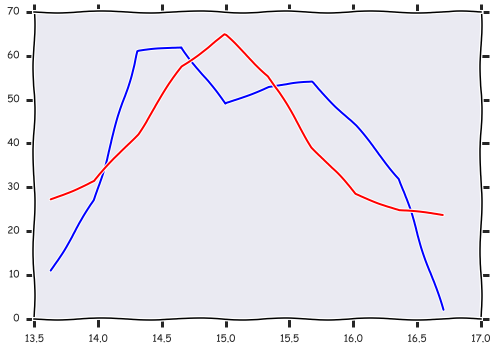

In [66]:
plt.plot(xs,ys)
plt.plot(xs, out.best_fit, 'r-')
plt.show()

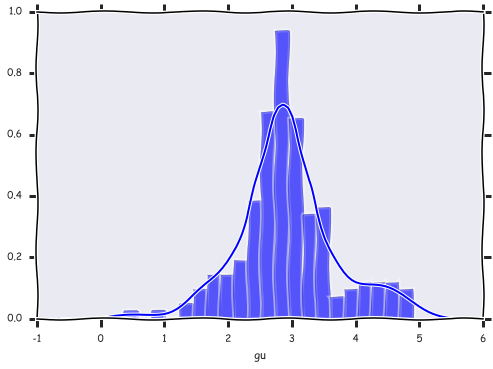

In [67]:
sns.distplot(rc_merged_2_lowg['gu'])

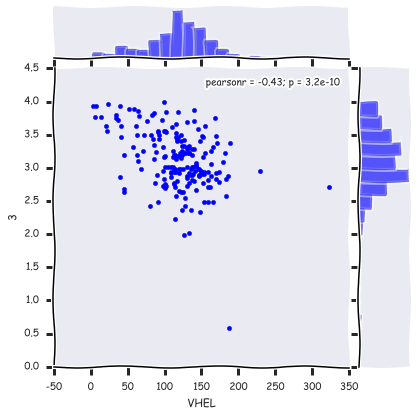

In [68]:
sns.jointplot(rc_merged_2_lowg['VHEL'],rc_merged_2_lowg['3'])

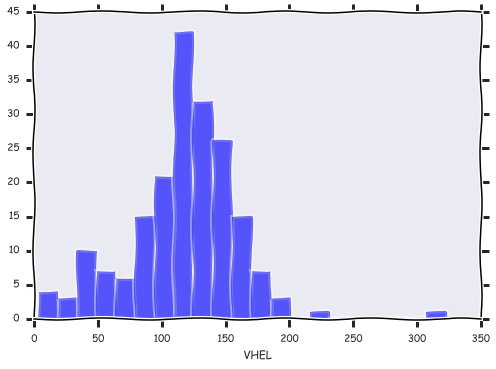

In [69]:
sns.distplot(rc_merged_2_lowg['VHEL'],kde=False)

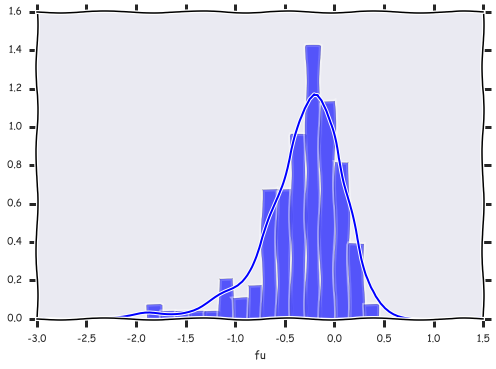

In [70]:
sns.distplot(rc_merged_2_lowg['fu'],kde=True)

In [71]:
rc_merged_2_lowg['fu'].describe()

count    193.000000
mean      -0.315037
std        0.392081
min       -1.892117
25%       -0.487833
50%       -0.244882
75%       -0.054632
max        0.439966
Name: fu, dtype: float64

In [72]:
rc_merged_2_lowg.columns

Index(['ID', 'Vmag', 'Vmag_ERR', 'UmB', 'UmB_ERR', 'BmV', 'BmV_ERR', 'VmR',
       'VmR_ERR', 'VmI', 'VmI_ERR', 'RA', 'DEC', 'GLON', 'GLAT', 'VHEL',
       'VHEL_ERR', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'ABUN', 'ABUN_ERR',
       'designation', 'j_m', 'j_cmsig', 'j_msigcom', 'j_snr', 'h_m', 'h_cmsig',
       'h_msigcom', 'h_snr', 'k_m', 'k_cmsig', 'k_msigcom', 'k_snr', 'ph_qual',
       'rd_flg', 'bl_flg', 'cc_flg', 'gal_contam', 'mp_flg', 'pts_key',
       'j_m_stdap', 'j_msig_stdap', 'h_m_stdap', 'h_msig_stdap', 'k_m_stdap',
       'k_msig_stdap', 'k_0', 'j_0', 'h_0', 'jmk_o', 'k_02', 'j_02', 'h_02',
       'jmk_o2', 'dist_k', 'errdist_k', '0', 'dist', 'errd', 'dist_uly',
       'errd_uly', '1_y', '2_x', '3', '4', '5', '6', 'id-u', 'tu', 'ertu',
       'gu', 'ergu', 'fu', 'erfu'],
      dtype='object')

In [73]:
rc_merged_2_lowg['GLON'].min(),rc_merged_2_lowg['GLON'].max()

(239.86282999999997, 240.60147999999998)

In [74]:
rc_merged_2_lowg['GLAT'].min(),rc_merged_2_lowg['GLAT'].max()

(-8.3984395000000003, -7.6605570999999992)

In [75]:
rc_merged_2_lowg.iloc[2][['GLAT','GLON']]

GLAT   -8.04157
GLON    240.418
Name: 4, dtype: object

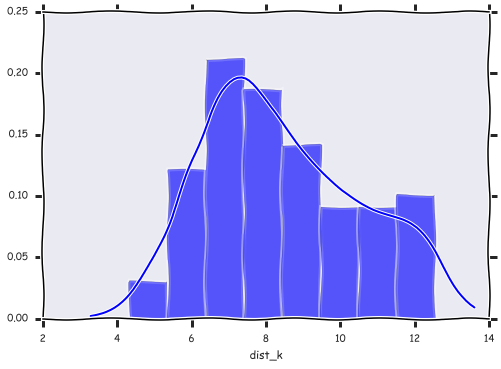

In [76]:
sns.distplot(rc_merged_2_lowg['dist_k'])

In [77]:
len(rc)

240

In [78]:
mags.columns

Index(['ID', 'Vmag', 'Vmag_ERR', 'UmB', 'UmB_ERR', 'BmV', 'BmV_ERR', 'VmR',
       'VmR_ERR', 'VmI', 'VmI_ERR', 'RA', 'DEC', 'GLON', 'GLAT', 'VHEL',
       'VHEL_ERR', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'ABUN', 'ABUN_ERR',
       'designation', 'j_m', 'j_cmsig', 'j_msigcom', 'j_snr', 'h_m', 'h_cmsig',
       'h_msigcom', 'h_snr', 'k_m', 'k_cmsig', 'k_msigcom', 'k_snr', 'ph_qual',
       'rd_flg', 'bl_flg', 'cc_flg', 'gal_contam', 'mp_flg', 'pts_key',
       'j_m_stdap', 'j_msig_stdap', 'h_m_stdap', 'h_msig_stdap', 'k_m_stdap',
       'k_msig_stdap', 'k_0', 'j_0', 'h_0', 'jmk_o', 'k_02', 'j_02', 'h_02',
       'jmk_o2'],
      dtype='object')

In [79]:
mags[['RA','DEC']].to_csv('canis_radec',index=None)